# Resource Estimator

In [1]:
from platform import python_version
print(python_version())

3.8.5


In [121]:
# Import libraries
import numpy as np
import scipy
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

### Exploration: *Is it there?*

In [14]:
# USER INPUT REQUIRED
Ptemp = 0.8
Pperm = 0.4
Pchem = 0.5

In [9]:
POSexpl = Ptemp * Pperm * Pchem
print("Probability of exploration success = {:.0f}%".format(POSexpl*100))
# Could potentially code in user option to adjust number of decimal places for POS

Probability of exploration success = 16%


### Appraisal and Development: *Assuming it's there, how big is it?*

In [33]:
# USER INPUT REQUIRED
#Cumulative confidence of optimistic case
Opt_case = 0.1

In [ ]:
# USER INPUT REQUIRED
Tmax = 280 #startup averages temperature for P90 reserves (degrees C)
Tmin = 250 #minimum temperature for the P10 reservoir (degrees C)

In [19]:
# USER INPUT REQUIRED
# Area > 250 deg C in km2
Area_P90 = 1
Area_P10 = 10

In [20]:
# USER INPUT REQUIRED
# Power Density 250 to 280 deg C (MWe/km2)
PowerDens_P90 = 10
PowerDens_P10 = 24

In [37]:
# Calculate nu and sigma for area > 250 degC (the mean and variance in log units required for specifying lognormal distributions)
area_nu = ((np.log(Area_P90)+np.log(Area_P10))/2)
print(area_nu)

area_sigma = (np.log(Area_P10)-np.log(Area_P90))/((norm.ppf(1-Opt_case)-(norm.ppf(Opt_case))))
print(area_sigma)

1.151292546497023
0.8983583473738543


In [38]:
# Calculate nu and sigma for power density (the mean and variance in log units required for specifying lognormal distributions)
powerdens_nu = ((np.log(PowerDens_P90)+np.log(PowerDens_P10))/2)
print(powerdens_nu)

powerdens_sigma = (np.log(PowerDens_P10)-np.log(PowerDens_P90))/((norm.ppf(1-Opt_case)-(norm.ppf(Opt_case))))
print(powerdens_sigma)

2.740319461670996
0.3415659427569994


In [43]:
# Calculate nu and sigma for MWe Capacity
capacity_nu = area_nu + powerdens_nu
print(capacity_nu)

capacity_sigma = ((area_sigma**2)+(powerdens_sigma**2))**0.5
print(capacity_sigma)

3.891612008168019
0.9611009382722299


In [127]:
# Calculate cumulative confidence curve for expected power capacity (epc)

prob = [0.1]
expected_power_capacity=[]
expected_development_size=[]
prob_desc = []

# Specify probability range
for i in range(1,100):
    prob.append(i)

for j in prob:
    # Calculate expected development size distribution
    eds = lognorm.ppf(j/100, capacity_sigma, loc=0, scale=np.exp(capacity_nu))
    expected_development_size.append(eds)
    # Calculate power capacity distribution
    epc = eds*POSexpl
    expected_power_capacity.append(epc)
    # Calculate 100-prob for plotting descending cumulative probability
    desc = 100-j
    prob_desc.append(desc)
    # Print results
    print(j, epc, eds, desc)

0.1 0.4021240626097626 2.5132753913110157 99.9
1 0.8379267606862624 5.237042254289139 99
2 1.0889027517256613 6.8056421982853825 98
3 1.2858217947566037 8.036386217228772 97
4 1.4570946957014996 9.106841848134371 96
5 1.6131038500461186 10.081899062788239 95
6 1.7589836732072772 10.99364795754548 94
7 1.8977071656626379 11.860669785391485 93
8 2.0311760280371995 12.694850175232494 92
9 2.1606943395726614 13.504339622329132 91
10 2.2872040490442274 14.29502530652642 90
11 2.4114138070749194 15.071336294218243 89
12 2.5338747074621235 15.836716921638269 88
13 2.655027396409587 16.593921227559914 87
14 2.7752327354959765 17.34520459684985 86
15 2.89479252364074 18.09245327275462 85
16 3.0139639515407297 18.83727469712956 84
17 3.1329699621433416 19.581062263395882 83
18 3.2520068550501358 20.325042844063343 82
19 3.3712499867457826 21.070312417161137 81
20 3.4908581252917994 21.81786328307374 80
21 3.610976835409984 22.568605221312396 79
22 3.7317411527936466 23.323382204960286 78
23 3.85

Text(0.5, 1.0, 'Cumulative Confidence in Power Capacity')

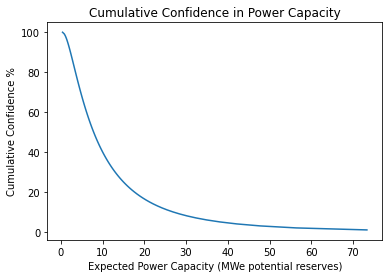

In [131]:
# Plot power capacity cumulative distribution
plt.plot(expected_power_capacity, prob_desc)
plt.xlabel("Expected Power Capacity (MWe potential reserves)")
plt.ylabel("Cumulative Confidence %")
plt.title("Cumulative Confidence in Power Capacity")

Text(0.5, 1.0, 'Cumulative Confidence in Developed Reservoir Size')

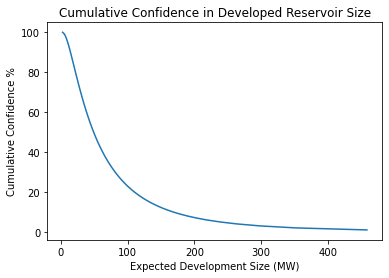

In [133]:
# Plot expected development size cumulative distribution
plt.plot(expected_development_size, prob_desc)
plt.xlabel("Expected Development Size (MW)")
plt.ylabel("Cumulative Confidence %")
plt.title("Cumulative Confidence in Developed Reservoir Size")